<a href="https://colab.research.google.com/github/yashsharma0558/Valorant-Weapon-Stats-EDA/blob/main/Valorant_Weapon_stats_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io
uploaded = files.upload()


Saving valorant-stats.csv to valorant-stats.csv


# Import Libraries & Data

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [18]:
df = pd.read_csv(io.BytesIO(uploaded['valorant-stats.csv']))
df

,Name,Weapon Type,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
0,Classic,Sidearm,0,6.75,Low,12,78,26,22,78,26,22,66,22,18
1,Shorty,Sidearm,200,3.30,Low,2,36,12,10,24,8,6,9,3,2
2,Frenzy,Sidearm,400,10.00,Low,13,78,26,22,63,21,17,63,21,17
3,Ghost,Sidearm,500,6.75,Medium,15,105,33,26,88,25,21,88,25,21
4,Sheriff,Sidearm,800,4.00,High,6,160,55,47,160,55,47,145,50,43
5,Stinger,SMG,1000,18.00,Low,20,67,27,23,62,25,21,62,25,21
6,Spectre,SMG,1600,13.33,Medium,30,78,26,22,66,22,18,66,22,18
7,Bulldog,Rifle,2100,9.15,Medium,24,116,35,30,116,35,30,116,35,30
8,Guardian,Rifle,2500,6.50,Medium,12,195,65,49,195,65,49,195,65,49
9,Phantom,Rifle,2900,11.00,Medium,30,156,39,33,140,35,30,124,31,26


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               17 non-null     object 
 1   Weapon Type        17 non-null     object 
 2   Price              17 non-null     int64  
 3   Fire Rate          17 non-null     float64
 4   Wall Penetration   17 non-null     object 
 5   Magazine Capacity  17 non-null     int64  
 6   HDMG_0             17 non-null     int64  
 7   BDMG_0             17 non-null     int64  
 8   LDMG_0             17 non-null     int64  
 9   HDMG_1             17 non-null     int64  
 10  BDMG_1             17 non-null     int64  
 11  LDMG_1             17 non-null     int64  
 12  HDMG_2             17 non-null     int64  
 13  BDMG_2             17 non-null     int64  
 14  LDMG_2             17 non-null     int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 2.1+ KB


# Check Data

In [8]:
df.isna().any() #this command checks for any missing values in the dataframe

Name                 False
Weapon Type          False
Price                False
Fire Rate            False
Wall Penetration     False
Magazine Capacity    False
HDMG_0               False
BDMG_0               False
LDMG_0               False
HDMG_1               False
BDMG_1               False
LDMG_1               False
HDMG_2               False
BDMG_2               False
LDMG_2               False
dtype: bool

In [9]:
display(df.columns)
display(df.index)

Index(['Name', 'Weapon Type', 'Price', 'Fire Rate', 'Wall Penetration',
       'Magazine Capacity', 'HDMG_0', 'BDMG_0', 'LDMG_0', 'HDMG_1', 'BDMG_1',
       'LDMG_1', 'HDMG_2', 'BDMG_2', 'LDMG_2'],
      dtype='object')

RangeIndex(start=0, stop=17, step=1)

# Available Weapon types in Valorant

In [10]:
df_weapon_type = df['Weapon Type'].value_counts() #create a series which contains the count of occurrences of each unique value in the 'Weapon Type' column
df_weapon_type


Sidearm    5
Rifle      4
SMG        2
Sniper     2
Shotgun    2
Heavy      2
Name: Weapon Type, dtype: int64

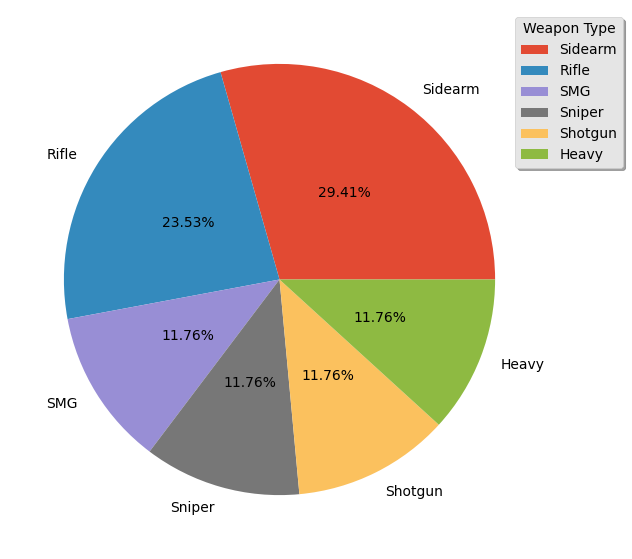

In [11]:
#plotting a pie chart that shows a spread of different weapon types that exist in the game
fig, ax = plt.subplots(figsize=(15,7))
plt.pie(df_weapon_type, labels=df_weapon_type.index,pctdistance=0.5, autopct='%1.2f%%', shadow=False)
plt.legend(loc='upper right', title='Weapon Type', shadow=True, bbox_to_anchor=(1.15, 1))
plt.show()

# Pricing Analysis of Weapons

## Based on Weapon

In [13]:
#analysing the most expensive weapons individually based on price
weapon_price = df[['Name', 'Price']].sort_values(by='Price', ascending=False)
weapon_price

,Name,Price
12,Operator,4500
16,Odin,3200
9,Phantom,2900
10,Vandal,2900
8,Guardian,2500
7,Bulldog,2100
6,Spectre,1600
15,Ares,1600
14,Judge,1500
11,Marshall,1100


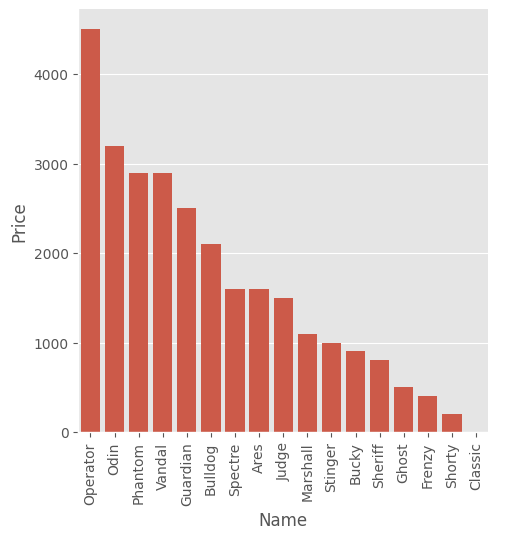

In [14]:
#using bar charts to plot categorical data
sns.catplot(kind='bar', data=weapon_price, x='Name', y='Price')
plt.xticks(rotation=90)
plt.show()

## Based on Type

In [15]:
# here, we are first grouping the data by "Weapon type" column, then summing up all the values in the "Price" column and then finally, sorting the values in ascending order
type_price = df.groupby('Weapon Type')[['Weapon Type', 'Price']].agg('sum').sort_values('Price', ascending=False).reset_index()
type_price

<ipython-input-15-249edbeb0c7c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  type_price = df.groupby('Weapon Type')[['Weapon Type', 'Price']].agg('sum').sort_values('Price', ascending=False).reset_index()


,Weapon Type,Price
0,Rifle,10400
1,Sniper,5600
2,Heavy,4800
3,SMG,2600
4,Shotgun,2400
5,Sidearm,1900


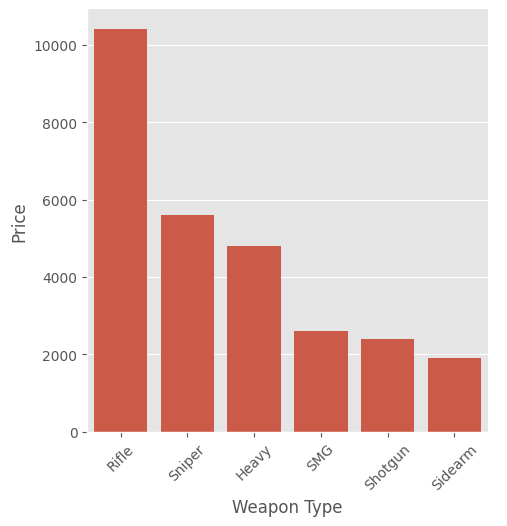

In [16]:
#using bar charts to plot categorical data
sns.catplot(kind='bar', data=type_price, x='Weapon Type', y='Price')
plt.xticks(rotation=45)
plt.show()

# Analysing fire rate of all Weapons

## Based on Weapon

In [20]:
#here we are picking the "Name" and "Fire Rate" columns and sorting them by fire rate
fire_rate = df[['Name', 'Fire Rate']].sort_values(by='Fire Rate', ascending=False)
fire_rate.head()

,Name,Fire Rate
5,Stinger,18.00
6,Spectre,13.33
16,Odin,12.00
9,Phantom,11.00
2,Frenzy,10.00


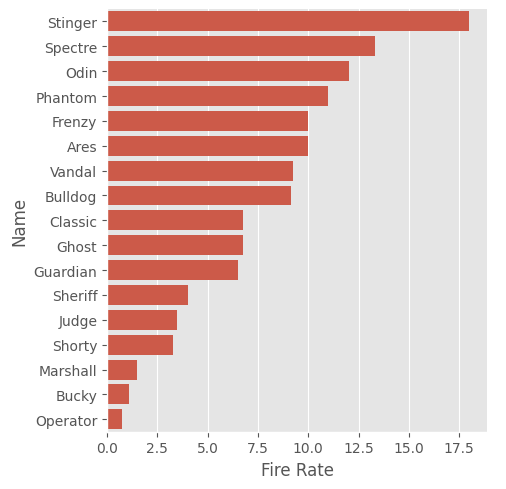

In [21]:
#using bar charts to plot categorical data
sns.catplot(data=fire_rate, y='Name', x='Fire Rate', kind='bar')
plt.show()

## Based on Type

In [22]:
#finding which category of weapon has the highest fire rate and arranging them in descending order
fire_rate_type = df.groupby('Weapon Type')[['Weapon Type', 'Fire Rate']].agg('mean').sort_values(by='Fire Rate', ascending=False).reset_index()
fire_rate_type

<ipython-input-22-bd4114264621>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fire_rate_type = df.groupby('Weapon Type')[['Weapon Type', 'Fire Rate']].agg('mean').sort_values(by='Fire Rate', ascending=False).reset_index()


,Weapon Type,Fire Rate
0,SMG,15.665
1,Heavy,11.000
2,Rifle,8.975
3,Sidearm,6.160
4,Shotgun,2.300
5,Sniper,1.125


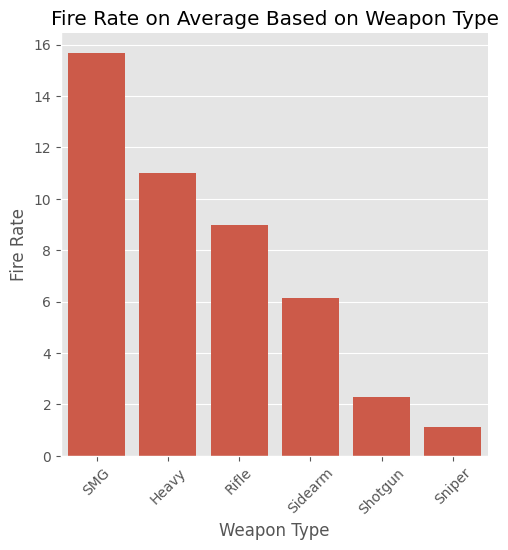

In [23]:
#using bar charts to plot categorical data
sns.catplot(kind='bar', data=fire_rate_type, x='Weapon Type', y='Fire Rate')
plt.xticks(rotation=45)
plt.title('Fire Rate on Average Based on Weapon Type')
plt.show()

# Analysing Wall Penetration of Weapons

In [30]:
#analysing how many weapons have high, medium or low penetration
wall_penet = df[df['Wall Penetration'] == 'high']['Name']
wall_penet

Series([], Name: Name, dtype: object)

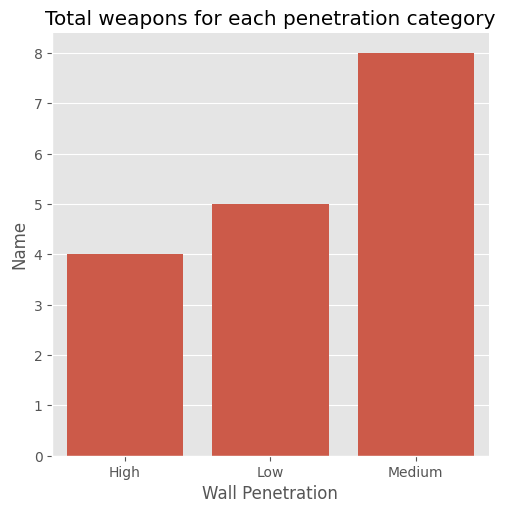

In [ ]:
#using bar charts to plot categorical data
sns.catplot(kind='bar', data=wall_penet, x='Wall Penetration', y='Name')
plt.title('Total weapons for each penetration category')
plt.show()

In [43]:
#Filtering out weapons with "High" Wall Penetration
wall_penet = df.loc[(df['Wall Penetration'] == "High") & df['Name']]
wall_penet = wall_penet[['Name', 'Weapon Type', 'Wall Penetration']]
wall_penet

,Name,Weapon Type,Wall Penetration
4,Sheriff,Sidearm,High
12,Operator,Sniper,High
15,Ares,Heavy,High
16,Odin,Heavy,High


# Analysing Weapons based on High Magazine Capacity

In [ ]:
#sorting weapons based on their magazine size in decending order
capacity = df[['Name', 'Weapon Type', 'Magazine Capacity']].sort_values('Magazine Capacity', ascending=False)
capacity

,Name,Weapon Type,Magazine Capacity
16,Odin,Heavy,100
15,Ares,Heavy,50
9,Phantom,Rifle,30
6,Spectre,SMG,30
10,Vandal,Rifle,25
7,Bulldog,Rifle,24
5,Stinger,SMG,20
3,Ghost,Sidearm,15
2,Frenzy,Sidearm,13
0,Classic,Sidearm,12


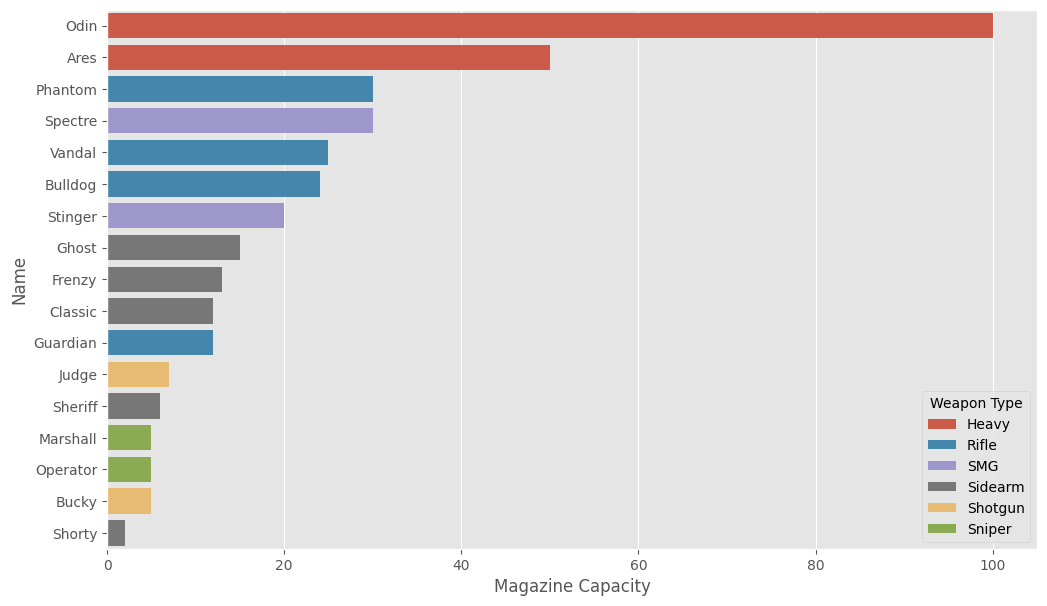

In [ ]:
#using bar charts to plot categorical data
plt.subplots(figsize=(12,7))
sns.barplot(data=capacity, x='Magazine Capacity', y='Name', hue='Weapon Type')
plt.show()

# Analysis of Weapons based on Damage dealt

In [45]:
damage = df[['Name', 'Weapon Type', 'HDMG_0','BDMG_0','LDMG_0','HDMG_1','BDMG_1','LDMG_1','HDMG_2','BDMG_2','LDMG_2']]
damage.columns = ['Name', 'Weapon Type', 'HD Close', 'BD Close','LD Close','HD Mid','BD Mid','LD Mid','HD Far','BD Far','LD Far']
damage.head()

,Name,Weapon Type,HD Close,BD Close,LD Close,HD Mid,BD Mid,LD Mid,HD Far,BD Far,LD Far
0,Classic,Sidearm,78,26,22,78,26,22,66,22,18
1,Shorty,Sidearm,36,12,10,24,8,6,9,3,2
2,Frenzy,Sidearm,78,26,22,63,21,17,63,21,17
3,Ghost,Sidearm,105,33,26,88,25,21,88,25,21
4,Sheriff,Sidearm,160,55,47,160,55,47,145,50,43


## Close Range Damage

In [ ]:
#Weapon damage in close quarters
close_damage = damage[['Name','Weapon Type','HD Close','BD Close','LD Close']]
close_damage.head()

,Name,Weapon Type,HD Close,BD Close,LD Close
0,Classic,Sidearm,78,26,22
1,Shorty,Sidearm,36,12,10
2,Frenzy,Sidearm,78,26,22
3,Ghost,Sidearm,105,33,26
4,Sheriff,Sidearm,160,55,47


In [ ]:
close_damage = pd.melt(close_damage, id_vars =['Name', 'Weapon Type'], value_vars =['HD Close','BD Close','LD Close']).rename(columns=str.title)
close_damage.head()

,Name,Weapon Type,Variable,Value
0,Classic,Sidearm,HD Close,78
1,Shorty,Sidearm,HD Close,36
2,Frenzy,Sidearm,HD Close,78
3,Ghost,Sidearm,HD Close,105
4,Sheriff,Sidearm,HD Close,160


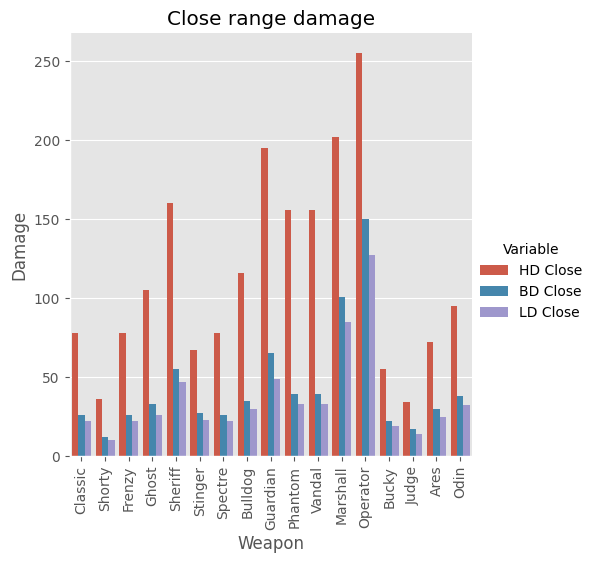

In [ ]:
#using bar charts to plot categorical data
sns.catplot(data=close_damage, x='Name', y='Value', hue='Variable', kind='bar')
plt.xticks(rotation=90)
plt.title('Close range damage')
plt.xlabel('Weapon')
plt.ylabel('Damage')
plt.show()

## Mid Range Damage

In [ ]:
#Weapon damage in mid range
mid_damage = damage[['Name','Weapon Type','HD Mid','BD Mid','LD Mid']]
mid_damage.head()

,Name,Weapon Type,HD Mid,BD Mid,LD Mid
0,Classic,Sidearm,78,26,22
1,Shorty,Sidearm,24,8,6
2,Frenzy,Sidearm,63,21,17
3,Ghost,Sidearm,88,25,21
4,Sheriff,Sidearm,160,55,47


In [ ]:
mid_damage = pd.melt(mid_damage, id_vars =['Name', 'Weapon Type'], value_vars =['HD Mid','BD Mid','LD Mid']).rename(columns=str.title)
mid_damage.head()

,Name,Weapon Type,Variable,Value
0,Classic,Sidearm,HD Mid,78
1,Shorty,Sidearm,HD Mid,24
2,Frenzy,Sidearm,HD Mid,63
3,Ghost,Sidearm,HD Mid,88
4,Sheriff,Sidearm,HD Mid,160


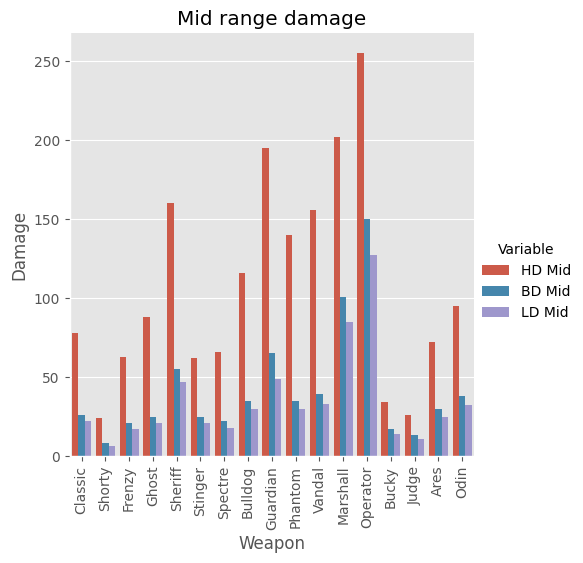

In [ ]:
#using bar charts to plot categorical data
sns.catplot(data=mid_damage, x='Name', y='Value', hue='Variable', kind='bar')
plt.xticks(rotation=90)
plt.title('Mid range damage')
plt.xlabel('Weapon')
plt.ylabel('Damage')
plt.show()

## Far Range Damage

In [ ]:
#Weapon damage in long range
far_damage = damage[['Name','Weapon Type','HD Far','BD Far','LD Far']]
far_damage.head()

,Name,Weapon Type,HD Far,BD Far,LD Far
0,Classic,Sidearm,66,22,18
1,Shorty,Sidearm,9,3,2
2,Frenzy,Sidearm,63,21,17
3,Ghost,Sidearm,88,25,21
4,Sheriff,Sidearm,145,50,43


In [ ]:
far_damage = pd.melt(far_damage, id_vars =['Name', 'Weapon Type'], value_vars =['HD Far','BD Far','LD Far']).rename(columns=str.title)
far_damage.head()

,Name,Weapon Type,Variable,Value
0,Classic,Sidearm,HD Far,66
1,Shorty,Sidearm,HD Far,9
2,Frenzy,Sidearm,HD Far,63
3,Ghost,Sidearm,HD Far,88
4,Sheriff,Sidearm,HD Far,145


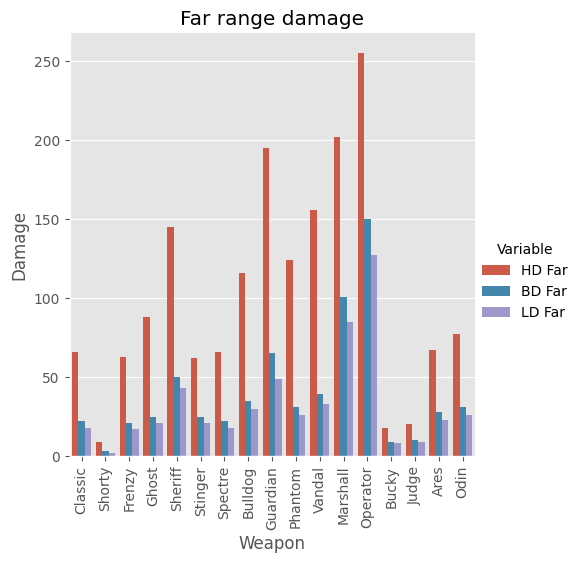

In [ ]:
#using bar charts to plot categorical data
sns.catplot(data=far_damage, x='Name', y='Value', hue='Variable', kind='bar')
plt.xticks(rotation=90)
plt.title('Far range damage')
plt.xlabel('Weapon')
plt.ylabel('Damage')
plt.show()

# Analysing Damage Per Weapon

In [ ]:
#finding the damage each weapon can do
damage_per_weapon = pd.melt(damage, id_vars =['Name', 'Weapon Type'], value_vars =['HD Close', 'BD Close','LD Close','HD Mid','BD Mid','LD Mid','HD Far','BD Far','LD Far']).rename(columns=str.title)
damage_per_weapon.head()

,Name,Weapon Type,Variable,Value
0,Classic,Sidearm,HD Close,78
1,Shorty,Sidearm,HD Close,36
2,Frenzy,Sidearm,HD Close,78
3,Ghost,Sidearm,HD Close,105
4,Sheriff,Sidearm,HD Close,160


In [ ]:
#here we are specifying the range at which the weapon does max damage
damage_per_weapon['Range'] = damage_per_weapon['Variable'].str.split(' ').str[1]
damage_per_weapon.head()

,Name,Weapon Type,Variable,Value,Range
0,Classic,Sidearm,HD Close,78,Close
1,Shorty,Sidearm,HD Close,36,Close
2,Frenzy,Sidearm,HD Close,78,Close
3,Ghost,Sidearm,HD Close,105,Close
4,Sheriff,Sidearm,HD Close,160,Close


In [ ]:
#here we are analysing, at which spot to aim to get the specified damage
damage_per_weapon['Aim'] = damage_per_weapon['Variable'].str.split(' ').str[0]
damage_per_weapon.head()

,Name,Weapon Type,Variable,Value,Range,Aim
0,Classic,Sidearm,HD Close,78,Close,HD
1,Shorty,Sidearm,HD Close,36,Close,HD
2,Frenzy,Sidearm,HD Close,78,Close,HD
3,Ghost,Sidearm,HD Close,105,Close,HD
4,Sheriff,Sidearm,HD Close,160,Close,HD


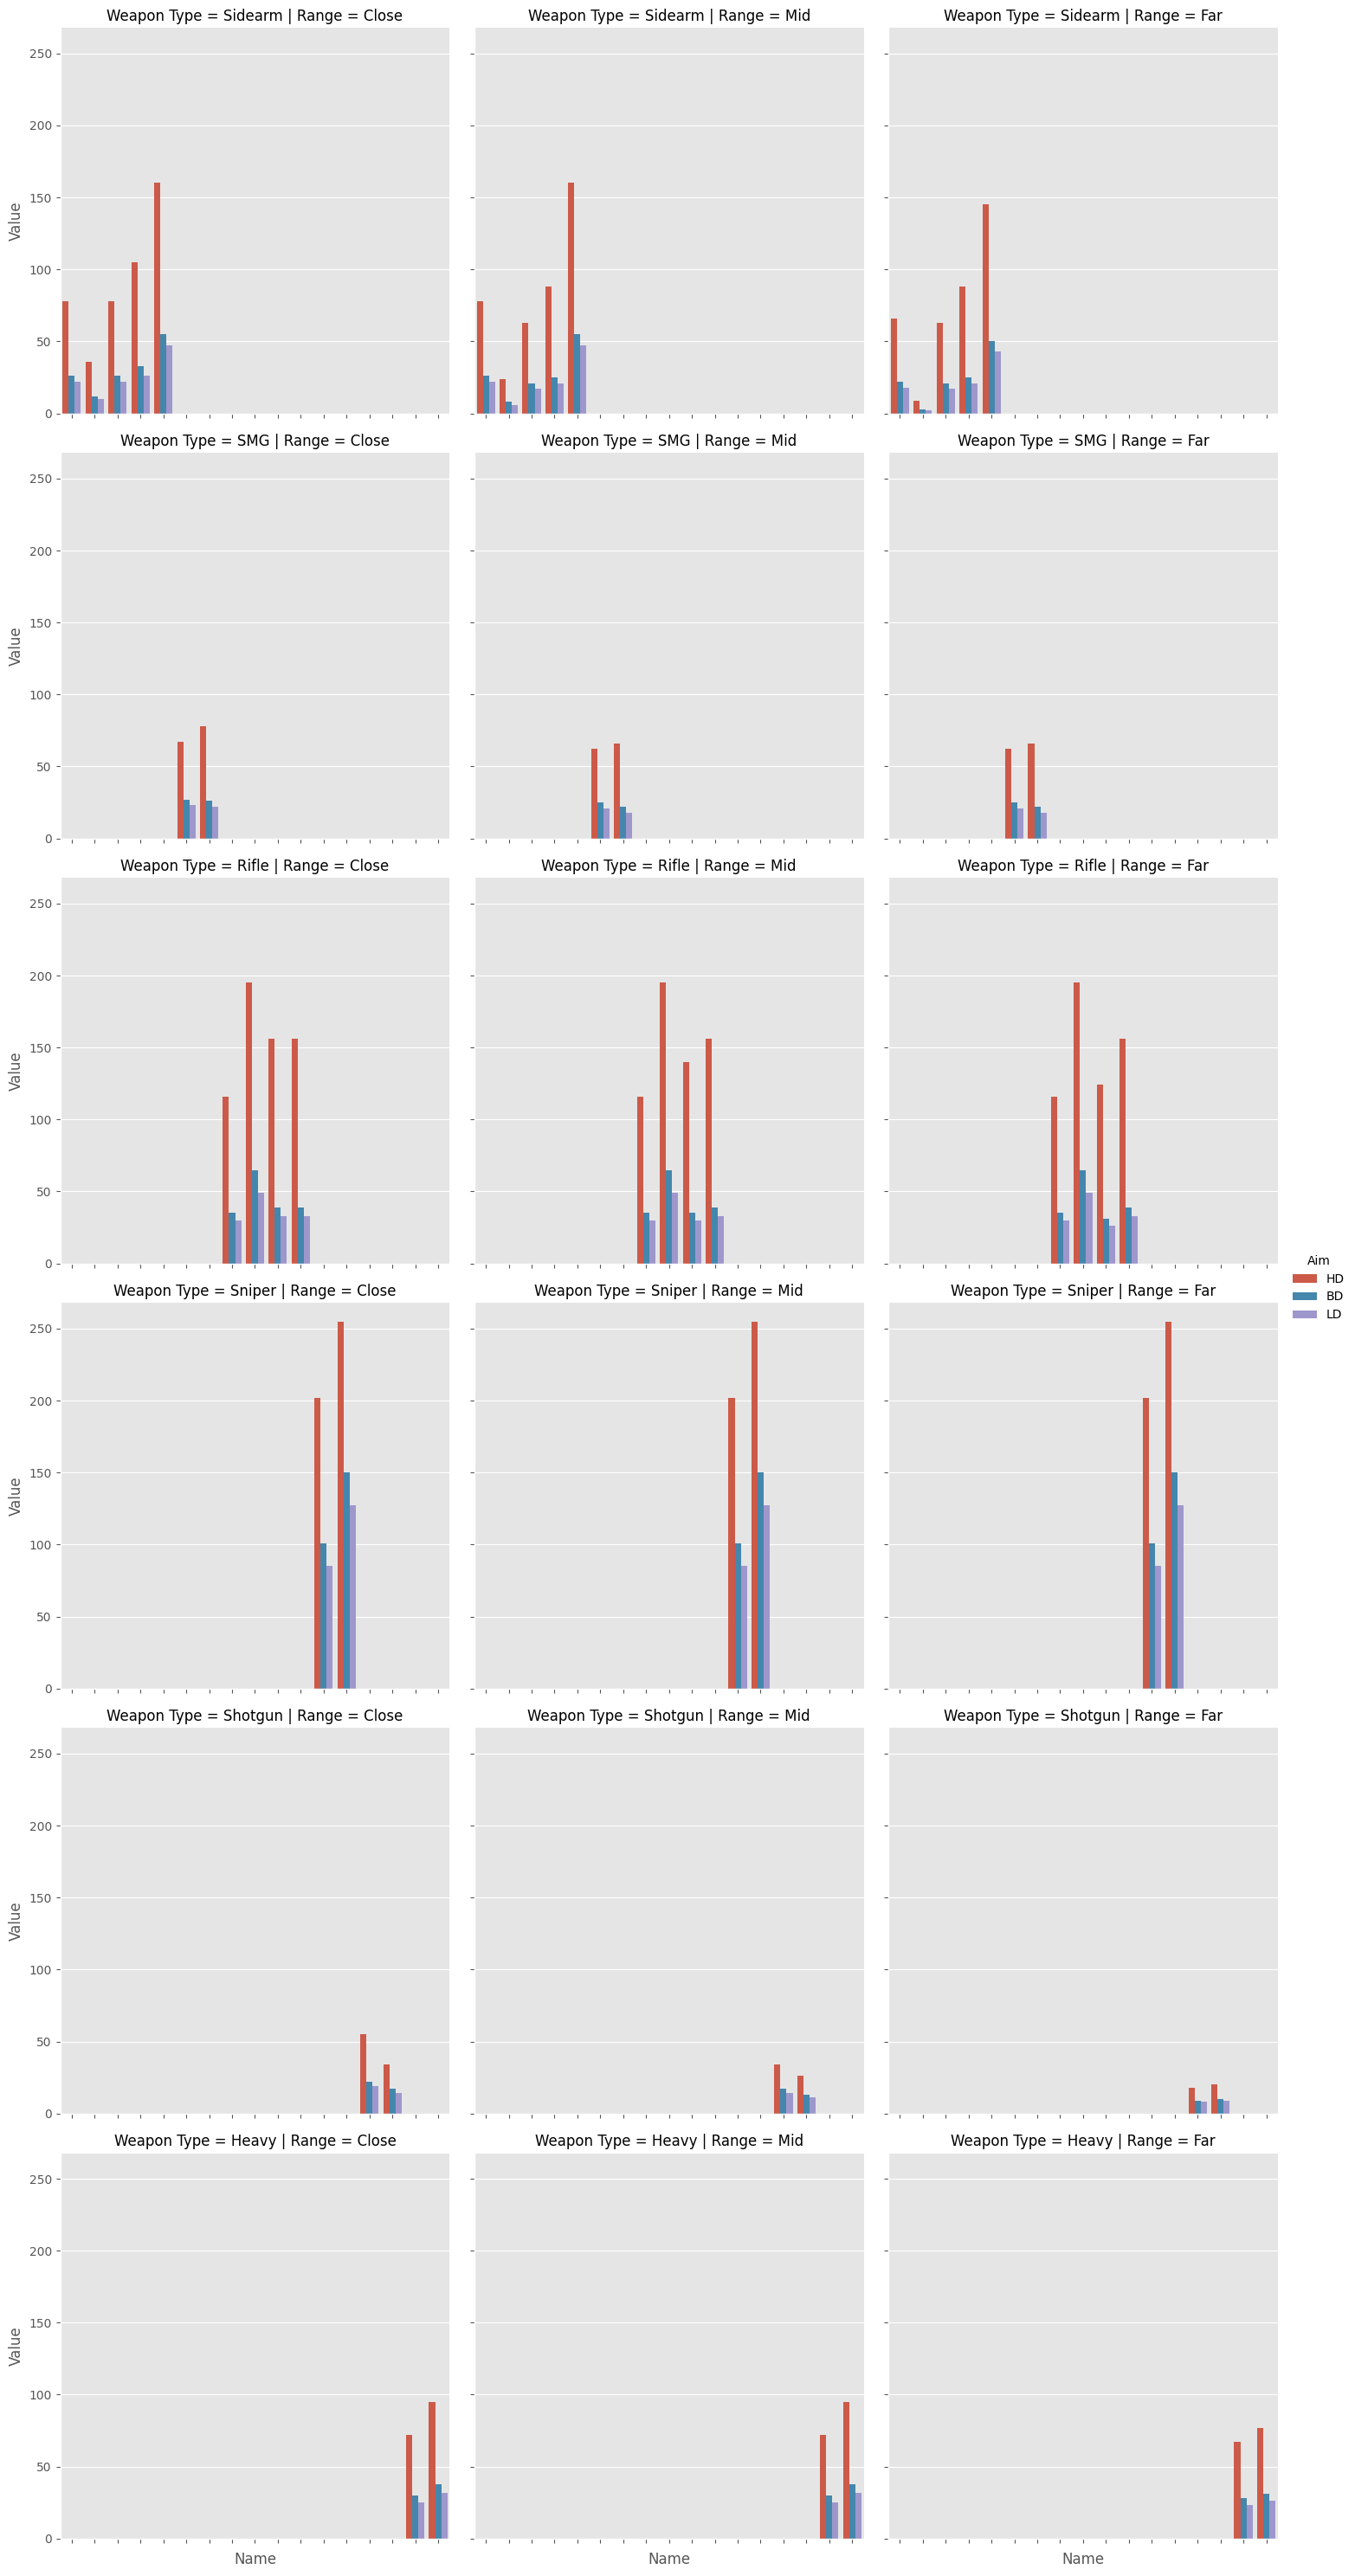

In [ ]:
#using bar charts to plot categorical data
g = sns.catplot(data=damage_per_weapon, x='Name', y='Value', hue='Aim', kind='bar', row='Weapon Type', col='Range')
g.set_xticklabels(rotation=90)
plt.show()

# Weapon with high damage for less cost: Weapon Damage Cost (WDC)

`assuming only headshots`

In [47]:
#here we calculate the best weapon based on the damage and price value
weapon_damage_cost = df[['Name', 'Price', 'HDMG_0', 'HDMG_1', 'HDMG_2']]
weapon_damage_cost.columns = ['Name', 'Price', 'HD Close', 'HD Mid', 'HD Far']
weapon_damage_cost = pd.melt(weapon_damage_cost, id_vars=['Name', 'Price'], value_vars=['HD Close', 'HD Mid', 'HD Far'])
weapon_damage_cost.head(11)

,Name,Price,variable,value
0,Classic,0,HD Close,78
1,Shorty,200,HD Close,36
2,Frenzy,400,HD Close,78
3,Ghost,500,HD Close,105
4,Sheriff,800,HD Close,160
5,Stinger,1000,HD Close,67
6,Spectre,1600,HD Close,78
7,Bulldog,2100,HD Close,116
8,Guardian,2500,HD Close,195
9,Phantom,2900,HD Close,156


In [48]:
#calculating the weapon damage based on its cost
weapon_damage_cost['WDC'] = np.round(weapon_damage_cost['Price'] / weapon_damage_cost['value'], 2)
weapon_damage_cost.head(11)

,Name,Price,variable,value,WDC
0,Classic,0,HD Close,78,0.00
1,Shorty,200,HD Close,36,5.56
2,Frenzy,400,HD Close,78,5.13
3,Ghost,500,HD Close,105,4.76
4,Sheriff,800,HD Close,160,5.00
5,Stinger,1000,HD Close,67,14.93
6,Spectre,1600,HD Close,78,20.51
7,Bulldog,2100,HD Close,116,18.10
8,Guardian,2500,HD Close,195,12.82
9,Phantom,2900,HD Close,156,18.59


In [ ]:
weapon_damage_cost_sorted = weapon_damage_cost.sort_values(by='WDC')
weapon_damage_cost_sorted.head()

,Name,Price,variable,value,WDC
0,Classic,0,HD Close,78,0.00
34,Classic,0,HD Far,66,0.00
17,Classic,0,HD Mid,78,0.00
3,Ghost,500,HD Close,105,4.76
4,Sheriff,800,HD Close,160,5.00


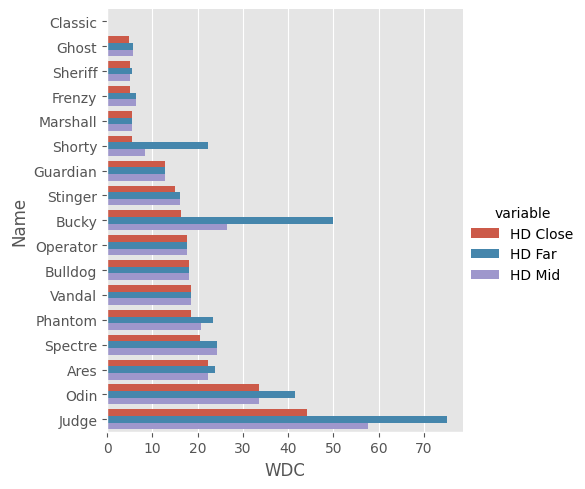

In [ ]:
#plotting the values based on their cost and damage
sns.catplot(data=weapon_damage_cost_sorted, x='WDC', y='Name', hue='variable', kind='bar')
plt.show()

# Regression Plot

In [ ]:
#Find the regression line through scatter plot
weapon_damage_cost.head()

,Name,Price,variable,value,WDC
0,Classic,0,HD Close,78,0.00
1,Shorty,200,HD Close,36,5.56
2,Frenzy,400,HD Close,78,5.13
3,Ghost,500,HD Close,105,4.76
4,Sheriff,800,HD Close,160,5.00


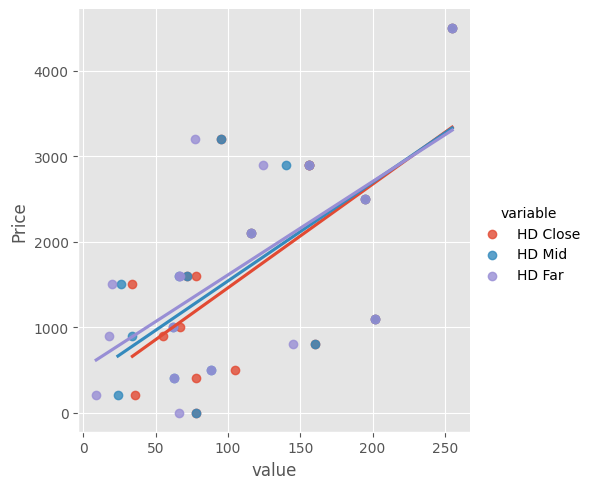

In [ ]:
sns.lmplot(data=weapon_damage_cost, x='value', y='Price', ci=None, hue='variable')
plt.show()